 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
# Reading whale returns
whale_returns = Path("../Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)

In [6]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_returns = Path("../Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns, index_col='Date', infer_datetime_format=True, parse_dates=True)

algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns.isnull()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns.dropna(inplace=True)

In [10]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = Path("../Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history, index_col='Date', infer_datetime_format=True, parse_dates=True)

sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [12]:
# Check Data Types

sp_tsx_history['Close'].dtypes

dtype('O')

In [13]:
# Fix Data Types
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('$','')
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(',','')
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('%','')

sp_tsx_history['Close'] = sp_tsx_history['Close'].astype(float)

C:\Users\AARONS~1\AppData\Local\Temp/ipykernel_11460/4138441164.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('$','')


In [14]:
# Calculate Daily Returns
daily_returns = sp_tsx_history[['Close']].pct_change()

daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [15]:
# Drop nulls
daily_returns.isnull().sum()

Close    1
dtype: int64

In [16]:
daily_returns.dropna(inplace=True)

In [17]:
# Rename `Close` Column to be specific to this portfolio.

daily_returns.rename(columns={'Close': 'SP TSX Close'}, inplace=True)


In [18]:
daily_returns.head()

,SP TSX Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_returns, daily_returns, algo_returns], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP TSX Close,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.003371,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001344,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.006555,-0.005447,0.001303
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,-0.000628,0.000682,-0.007247
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002254,0.002981,0.005256
2019-04-29,0.001254,0.002719,0.006251,0.005223,-0.000788,0.005208,0.002829


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

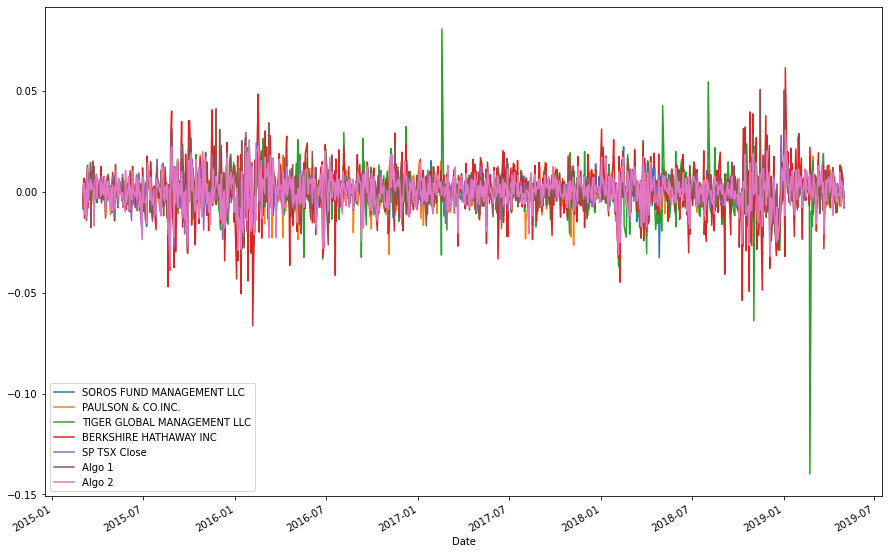

In [20]:
# Plot daily returns of all portfolios

combined_df.plot(figsize=(15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

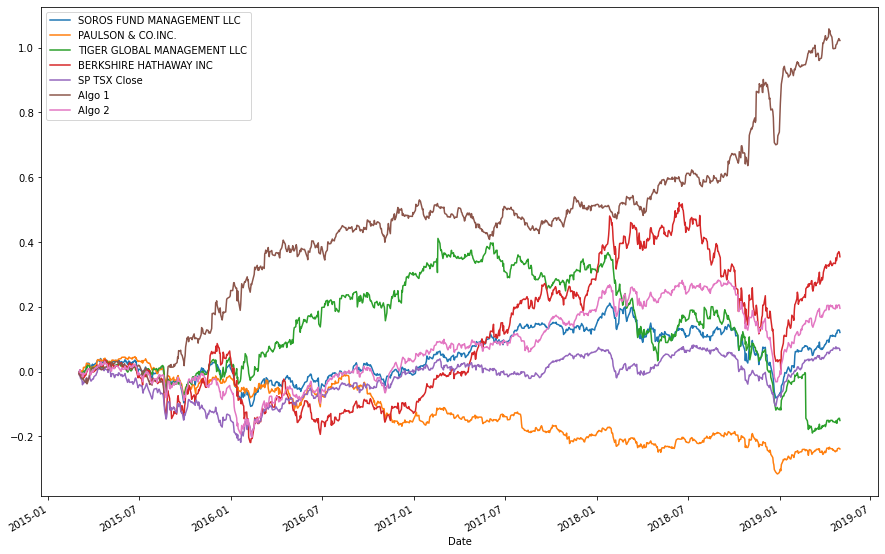

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns

# Plot cumulative returns

cumulative_returns.plot(figsize=(15,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'COMBINED DF'}>

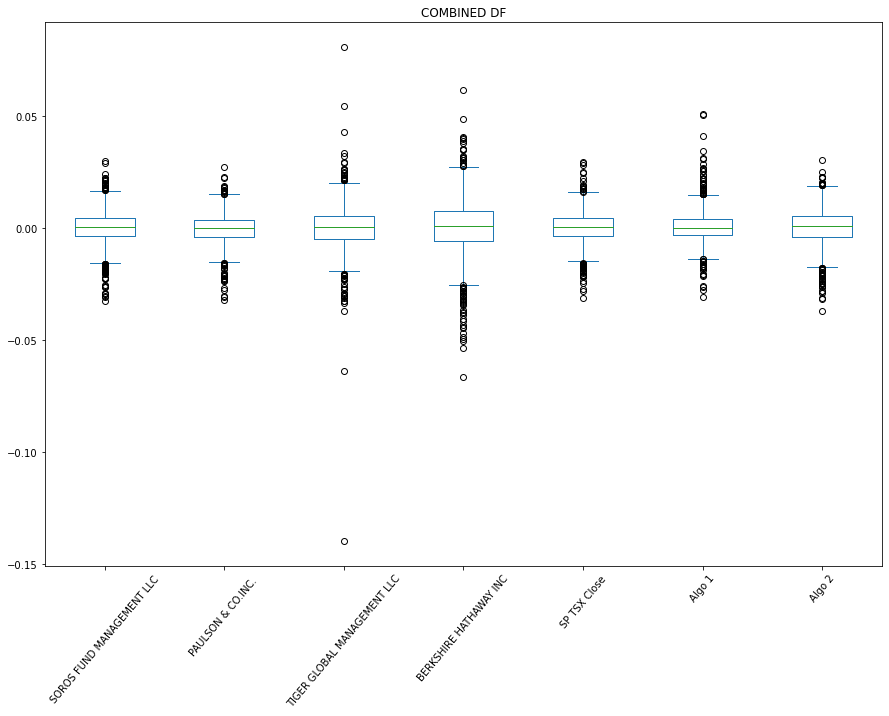

In [22]:
# Box plot to visually show risk

combined_df.plot.box(figsize=(15,10),title="COMBINED DF",rot=50)

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
all_std = combined_df.std()
all_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
SP TSX Close                   0.007034
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
# Calculate  the daily standard deviation of S&P TSX 60
sp500_std = round(daily_returns.std(),2)
sp500_std = sp500_std['SP TSX Close']

In [25]:
# Determine which portfolios are riskier than the S&P TSX 60
all_std > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
SP TSX Close                   False
Algo 1                         False
Algo 2                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_df * np.sqrt (252)

annual_std.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP TSX Close,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,-0.135407,-0.030830,-0.015073
2015-03-04,0.035399,0.051454,-0.040226,0.066880,-0.053506,-0.136343,0.038356
2015-03-05,0.063752,0.064705,0.037379,0.106777,0.021334,-0.015161,0.068628
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,-0.158302,-0.078686,-0.181927
2015-03-09,0.009243,0.067076,0.092751,-0.026232,-0.104054,-0.086469,0.020688
2015-03-10,-0.162920,-0.084781,-0.191751,-0.154602,-0.227338,-0.022091,-0.192960
2015-03-11,0.063687,0.081962,0.052574,-0.018203,0.105644,0.047526,0.009600
2015-03-12,0.131197,0.163057,0.208224,0.171467,0.033948,-0.046587,0.185210
2015-03-13,-0.039643,-0.022675,-0.058691,-0.129254,-0.042151,-0.086085,-0.080349


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

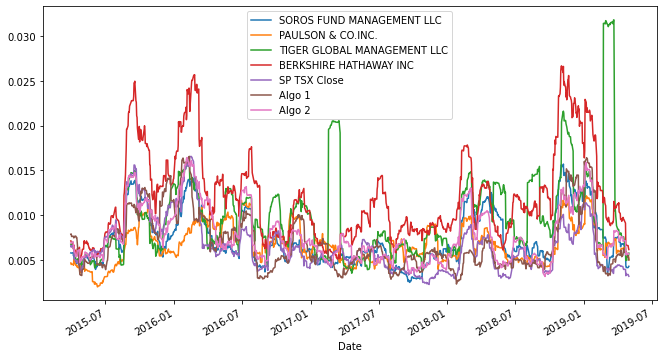

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window =21).std().plot(figsize=(11, 6))

# Plot the rolling standard deviation

### Calculate and plot the correlation

In [28]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation.style.background_gradient(cmap='summer')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP TSX Close,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.673930,0.313795,0.826667
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.486511,0.266363,0.674015
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.440583,0.161236,0.506689
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.557250,0.289378,0.684609
SP TSX Close,0.673930,0.486511,0.440583,0.557250,1.000000,0.310276,0.737370
Algo 1,0.313795,0.266363,0.161236,0.289378,0.310276,1.000000,0.285455
Algo 2,0.826667,0.674015,0.506689,0.684609,0.737370,0.285455,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

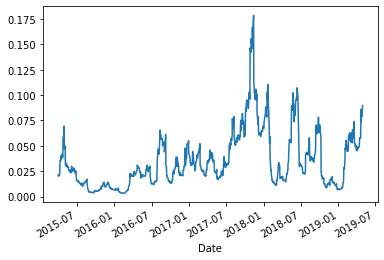

In [29]:
# Calculate covariance of a single portfolio
cov_sp_tsx_history = combined_df['Algo 1'].rolling(21).mean().cov(combined_df['SP TSX Close'])
# Calculate variance of S&P TSX
var_sp_tsx_history = combined_df['SP TSX Close'].rolling(21).var()
# Computing beta
beta = cov_sp_tsx_history / var_sp_tsx_history
# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

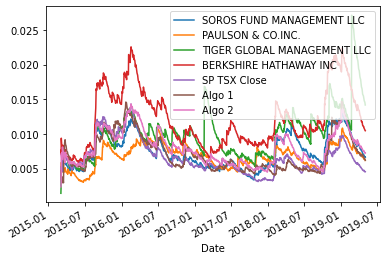

In [30]:
# Use `ewm` to calculate the rolling window

combined_df.ewm(com=None, span=None, halflife=21, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean()  * 256) / (combined_df.std()  * np.sqrt(256))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.288975
PAULSON & CO.INC.             -0.551923
TIGER GLOBAL MANAGEMENT LLC   -0.145597
BERKSHIRE HATHAWAY INC         0.470737
SP TSX Close                   0.197096
Algo 1                         1.503305
Algo 2                         0.399954
dtype: float64

<AxesSubplot:>

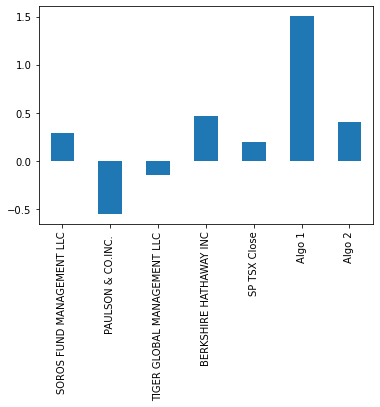

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:
# Reading data from 1st stock
AAPL_df = Path("../CustomResources/AAPL.csv")
AAPL_df = pd.read_csv(AAPL_df, index_col='Date', infer_datetime_format=True, parse_dates=True)
AAPL_df['SYM'] = 'AAPL'
AAPL_df = AAPL_df[['SYM', 'Close']]
AAPL_df.head()

,SYM,Close
Date,,
2018-12-03,AAPL,46.205002
2018-12-04,AAPL,44.172501
2018-12-06,AAPL,43.680000
2018-12-07,AAPL,42.122501
2018-12-10,AAPL,42.400002


In [34]:
# Reading data from 2nd stock
MSFT_df = Path("../CustomResources/MSFT.csv")
MSFT_df = pd.read_csv(MSFT_df, index_col='Date', infer_datetime_format=True, parse_dates=True)
MSFT_df['SYM'] = 'MSFT'
MSFT_df = MSFT_df[['SYM', 'Close']]
MSFT_df.head()

,SYM,Close
Date,,
2018-12-03,MSFT,112.089996
2018-12-04,MSFT,108.519997
2018-12-06,MSFT,109.190002
2018-12-07,MSFT,104.820000
2018-12-10,MSFT,107.589996


In [35]:
# Reading data from 3rd stock
NVDA_df = Path("../CustomResources/NVDA.csv")
NVDA_df = pd.read_csv(NVDA_df, index_col='Date', infer_datetime_format=True, parse_dates=True)
NVDA_df['SYM'] = 'NVDA'
NVDA_df = NVDA_df[['SYM', 'Close']]
NVDA_df.head()

,SYM,Close
Date,,
2018-12-03,NVDA,42.509998
2018-12-04,NVDA,39.277500
2018-12-06,NVDA,39.572498
2018-12-07,NVDA,36.902500
2018-12-10,NVDA,37.965000


In [36]:
# Combine all stocks in a single DataFrame
combined_df_custom = pd.concat([AAPL_df, NVDA_df, MSFT_df], axis="rows", join="inner")
combined_df_custom

,SYM,Close
Date,,
2018-12-03,AAPL,46.205002
2018-12-04,AAPL,44.172501
2018-12-06,AAPL,43.680000
2018-12-07,AAPL,42.122501
2018-12-10,AAPL,42.400002
...,...,...
2019-12-23,MSFT,157.410004
2019-12-24,MSFT,157.380005
2019-12-26,MSFT,158.669998


In [37]:
# Reset Date index
combined_df_custom = combined_df_custom.reset_index()
combined_df_custom.head()

,Date,SYM,Close
0,2018-12-03,AAPL,46.205002
1,2018-12-04,AAPL,44.172501
2,2018-12-06,AAPL,43.680000
3,2018-12-07,AAPL,42.122501
4,2018-12-10,AAPL,42.400002


In [38]:
# Reorganize portfolio data by having a column per symbol
portfolio = combined_df_custom.pivot_table(values="Close",index="Date",columns="SYM")
portfolio.head()

SYM,AAPL,MSFT,NVDA
Date,,,
2018-12-03,46.205002,112.089996,42.509998
2018-12-04,44.172501,108.519997,39.277500
2018-12-06,43.680000,109.190002,39.572498
2018-12-07,42.122501,104.820000,36.902500
2018-12-10,42.400002,107.589996,37.965000


In [39]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2018-12-03 to 2019-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    270 non-null    float64
 1   MSFT    270 non-null    float64
 2   NVDA    270 non-null    float64
dtypes: float64(3)
memory usage: 8.4 KB


In [40]:
# Calculate daily returns
daily_returns_custom = portfolio.pct_change()

# Drop NAs

# daily_returns_custom.isnull()

daily_returns_custom = daily_returns_custom.dropna().copy()

# Display sample data

daily_returns_custom.head(10)

SYM,AAPL,MSFT,NVDA
Date,,,
2018-12-04,-0.043989,-0.031849,-0.076041
2018-12-06,-0.011149,0.006174,0.007511
2018-12-07,-0.035657,-0.040022,-0.067471
2018-12-10,0.006588,0.026426,0.028792
2018-12-11,-0.005719,0.009295,-0.024167
2018-12-12,0.002787,0.004512,0.004791
2018-12-13,0.010940,0.003392,-0.000067
2018-12-14,-0.031998,-0.031247,-0.016388
2018-12-17,-0.009306,-0.029614,-0.019597


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns = daily_returns_custom.dot(weights)

# Display sample data

portfolio_returns.head()

Date
2018-12-04   -0.050626
2018-12-06    0.000845
2018-12-07   -0.047717
2018-12-10    0.020602
2018-12-11   -0.006864
dtype: float64

In [43]:
print(portfolio.index.min())
print(portfolio.index.max())

2018-12-03 00:00:00
2019-12-30 00:00:00


In [44]:
print(combined_df.index.min())
print(combined_df.index.max())

2015-03-03 00:00:00
2019-05-01 00:00:00


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Join your returns DataFrame to the original returns DataFrame
# combined_df_custom = pd.concat([combined_df, daily_returns_custom])
# combined_df_custom.head()

combined_df['Custom'] = portfolio_returns

In [46]:
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP TSX Close,Algo 1,Algo 2,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530,-0.001942,-0.000949,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.003371,-0.008589,0.002416,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001344,-0.000955,0.004323,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972,-0.004957,-0.011460,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.006555,-0.005447,0.001303,NaN


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_df = combined_df.dropna()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP TSX Close,Algo 1,Algo 2,Custom
Date,,,,,,,,
2018-12-04,-0.025610,-0.015528,-0.030254,-0.037941,-0.013839,0.000822,-0.031953,-0.050626
2018-12-06,0.004427,-0.001312,-0.005373,0.007661,-0.016179,-0.006886,-0.003116,0.000845
2018-12-07,-0.019902,-0.012730,-0.022698,-0.024372,-0.009498,0.003690,-0.015535,-0.047717
2018-12-10,-0.009854,-0.004736,-0.007709,-0.002190,-0.004518,-0.016156,-0.004270,0.020602
2018-12-11,-0.001686,-0.003164,0.000611,0.001262,-0.004104,-0.008391,-0.002542,-0.006864


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`
annual_std_custom = combined_df * np.sqrt (252)

annual_std_custom.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP TSX Close,Algo 1,Algo 2,Custom
Date,,,,,,,,
2018-12-04,-0.406539,-0.246503,-0.480272,-0.602300,-0.219687,0.013055,-0.507242,-0.803668
2018-12-06,0.070284,-0.020835,-0.085290,0.121616,-0.256834,-0.109316,-0.049464,0.013415
2018-12-07,-0.315929,-0.202084,-0.360318,-0.386898,-0.150774,0.058572,-0.246608,-0.757479
2018-12-10,-0.156434,-0.075182,-0.122380,-0.034769,-0.071727,-0.256462,-0.067780,0.327048
2018-12-11,-0.026764,-0.050234,0.009707,0.020037,-0.065155,-0.133195,-0.040355,-0.108962
2018-12-12,0.144906,0.129332,0.044411,0.277405,0.124710,0.032513,0.100337,0.063978
2018-12-13,-0.098910,-0.080263,0.007560,-0.068895,-0.035125,-0.199321,-0.165219,0.075484
2018-12-14,-0.115395,-0.194827,-0.323318,-0.244320,-0.167114,-0.119885,-0.215477,-0.421377
2018-12-17,-0.319376,-0.156155,-0.265249,-0.502634,-0.252794,0.025783,-0.398130,-0.309646


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

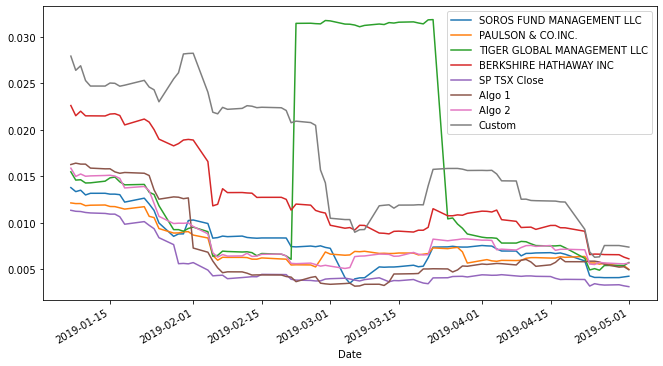

In [49]:
# Calculate rolling standard deviation
# Plot rolling standard deviation

combined_df.rolling(window =21).std().plot(figsize=(11, 6))


### Calculate and plot the correlation

In [50]:
# Calculate and plot the correlation
correlation_custom = combined_df.corr()
# Display de correlation matrix
correlation_custom.style.background_gradient(cmap='summer')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP TSX Close,Algo 1,Algo 2,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.808223,0.475928,0.823027,0.698545,0.286845,0.867829,0.706589
PAULSON & CO.INC.,0.808223,1.000000,0.396402,0.689830,0.515343,0.381470,0.796855,0.639739
TIGER GLOBAL MANAGEMENT LLC,0.475928,0.396402,1.000000,0.299009,0.375923,0.131053,0.360348,0.294399
BERKSHIRE HATHAWAY INC,0.823027,0.689830,0.299009,1.000000,0.669696,0.216109,0.810696,0.805428
SP TSX Close,0.698545,0.515343,0.375923,0.669696,1.000000,0.265360,0.711756,0.570103
Algo 1,0.286845,0.381470,0.131053,0.216109,0.265360,1.000000,0.397445,0.149085
Algo 2,0.867829,0.796855,0.360348,0.810696,0.711756,0.397445,1.000000,0.726960
Custom,0.706589,0.639739,0.294399,0.805428,0.570103,0.149085,0.726960,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

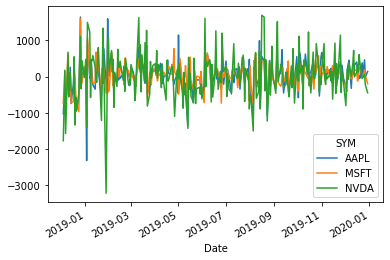

In [58]:
# Calculate and plot Beta
#MSFT_covariance = daily_returns_custom["MSFT"].rolling(window=60).cov(combined_df["SP TSX Close"])
#AAPL_covariance = daily_returns_custom["AAPL"].rolling(window=60).cov(combined_df["SP TSX Close"])
#NVDA_covariance = daily_returns_custom["NVDA"].rolling(window=60).cov(combined_df["SP TSX Close"])

# Calculate variance of S&P TSX
variance = combined_df['SP TSX Close'].var()

# Computing beta
beta = daily_returns_custom / variance
# Plot beta trend
beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio_custom = (combined_df.mean()  * 256) / (combined_df.std()  * np.sqrt(256))
sharpe_ratio_custom

SOROS FUND MANAGEMENT LLC      0.288975
PAULSON & CO.INC.             -0.551923
TIGER GLOBAL MANAGEMENT LLC   -0.145597
BERKSHIRE HATHAWAY INC         0.470737
SP TSX Close                   0.197096
Algo 1                         1.503305
Algo 2                         0.399954
AAPL                           1.685225
MSFT                           1.549898
NVDA                           0.915489
dtype: float64

<AxesSubplot:>

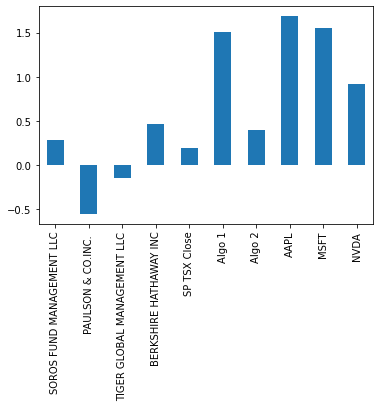

In [55]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_custom.plot.bar()

### How does your portfolio do?

Write your answer here!

In [ ]:
#I believe that my portfolio outperforms the other portfolios